In [9]:
!pip install rdkit
!pip install dgl
!pip install networkx

You should consider upgrading via the 'C:\Users\qinghegao\git\AI-in-Bio-Chemical-Engineering-Lecture-Coding\venv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached dgl-2.0.0-cp39-cp39-win_amd64.whl (4.6 MB)
  Using cached torchdata-0.7.1-cp39-cp39-win_amd64.whl (1.3 MB)


You should consider upgrading via the 'C:\Users\qinghegao\git\AI-in-Bio-Chemical-Engineering-Lecture-Coding\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Molecualr descriptors

In [8]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw # For 2D representation of molecule


# Create a molecule object for benzene
benzene = Chem.MolFromSmiles('c1ccccc1')

# Adding H-atoms to fulfil valency of C -atom 
benzene =  Chem.AddHs (benzene)

# Visualize molecule in 2D
mol_image = Draw.MolToImage (benzene) 
mol_image.show()

# Calculate some molecular descriptors for benzene
molecular_weight = Descriptors.MolWt(benzene)
logP = Descriptors.MolLogP(benzene)
num_rings = Descriptors.RingCount(benzene)


print('Benzene has molecular weight: ', molecular_weight)
print('Benzene has hydrophobicity: ', logP)
print('Benzene has the number of right count: ', num_rings)


Benzene has molecular weight:  78.11399999999996
Benzene has hydrophobicity:  1.6866
Benzene has the number of right count:  1


## Molecular graph

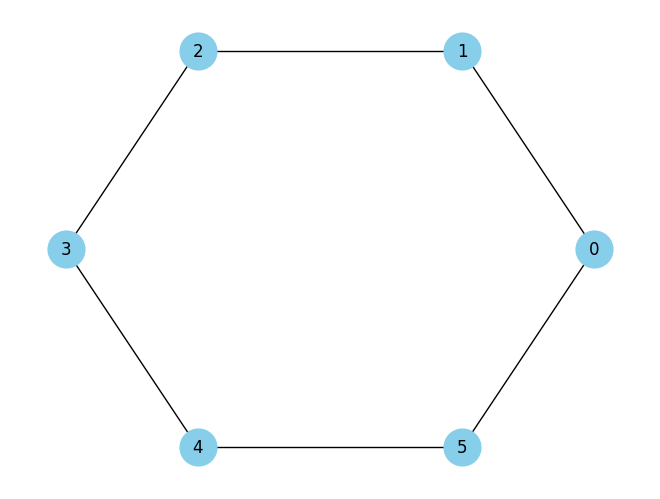

In [11]:
import dgl
import torch
import networkx as nx
import matplotlib.pyplot as plt
# Step 1: Create a graph for benzene. Benzene has 6 carbon atoms.
g = dgl.graph(([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], 
               [1, 2, 3, 4, 5, 0, 5, 0, 1, 2, 3, 4]))  # Adding edges for the ring structure and its reverse
# Add node features - all nodes are carbon in benzene, 
# but let's assign them an arbitrary feature for demonstration, such as atomic number 6 for carbon.
g.ndata['atomic_number'] = torch.tensor([6, 6, 6, 6, 6, 6])

# Add edge features - for simplicity, let's assume all bonds are single (feature value 1)
# In reality, you would distinguish between single and double bonds.
g.edata['bond_type'] = torch.tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Step 3: Visualize the graph (This step requires additional libraries like networkx and matplotlib)
# Convert to networkx graph to visualize

nx_g = g.to_networkx().to_undirected()
pos = nx.circular_layout(nx_g)  # Position nodes in a circle
nx.draw(nx_g, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
plt.show()

# Graph Neural Network

In [16]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GraphConv

class SimpleGCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(SimpleGCN, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        # g is the graph and inputs is the input node features
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# Example usage
# Assume a graph `g` and input features `features` are already defined
# g = Your graph
# features = Your input node features as a PyTorch tensor
# Initialize the model
model = SimpleGCN(in_feats=1, hidden_size=16, num_classes=2)
print(model)

SimpleGCN(
  (conv1): GraphConv(in=1, out=16, normalization=both, activation=None)
  (conv2): GraphConv(in=16, out=2, normalization=both, activation=None)
)
